In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [2]:
cc=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [3]:
cc.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
cc.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [5]:
cc.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
cc.shape

(42, 2)

In [8]:
cc.dtypes

Quarter     object
Sales      float64
dtype: object

In [9]:
cc.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [10]:
cc.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [11]:
cc[cc.duplicated()]

,Quarter,Sales


In [12]:
cc[['Quarters','Year']]=cc['Quarter'].str.split(pat='_',expand=True)

In [13]:
cc.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [14]:
cc_final=pd.get_dummies(data=cc,columns=['Quarters'])
cc_final

,Quarter,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
0,Q1_86,1734.827000,86,1,0,0,0
1,Q2_86,2244.960999,86,0,1,0,0
2,Q3_86,2533.804993,86,0,0,1,0
3,Q4_86,2154.962997,86,0,0,0,1
4,Q1_87,1547.818996,87,1,0,0,0
5,Q2_87,2104.411995,87,0,1,0,0
6,Q3_87,2014.362999,87,0,0,1,0
7,Q4_87,1991.746998,87,0,0,0,1
8,Q1_88,1869.049999,88,1,0,0,0
9,Q2_88,2313.631996,88,0,1,0,0


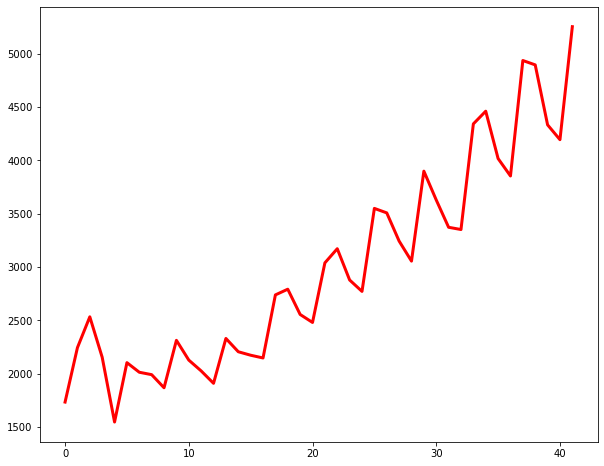

In [15]:
plt.figure(figsize=(10,8))
plt.plot(cc_final['Sales'],color='red',linewidth=3)

<AxesSubplot:>

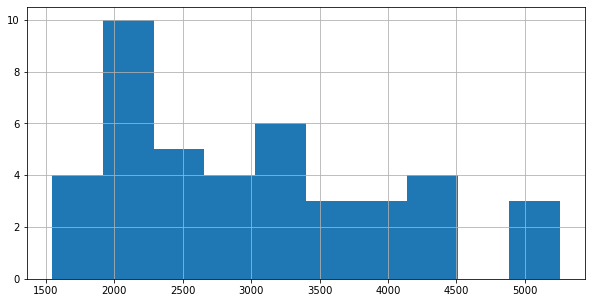

In [16]:
cc['Sales'].hist(figsize=(10,5))

<AxesSubplot:ylabel='Density'>

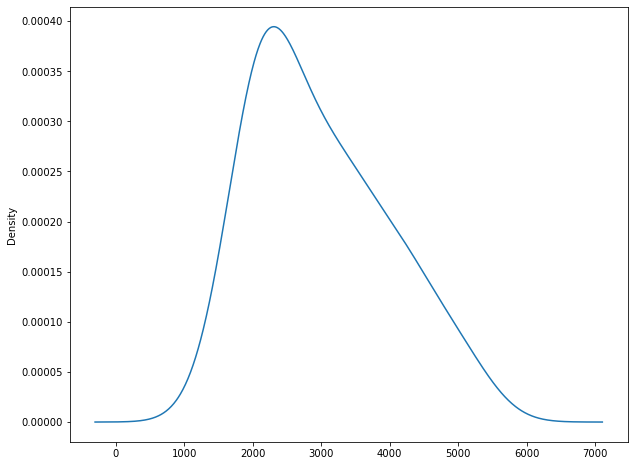

In [17]:
cc['Sales'].plot(kind='density',figsize=(10,8))

<AxesSubplot:xlabel='Year', ylabel='Sales'>

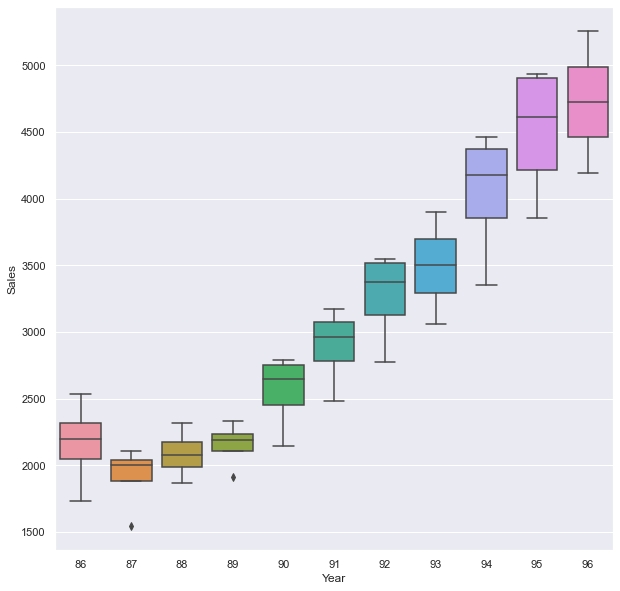

In [18]:
sn.set(rc={'figure.figsize':(10,10)})
sn.boxplot(x=cc_final['Year'],y=cc_final['Sales'],data=cc_final)

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

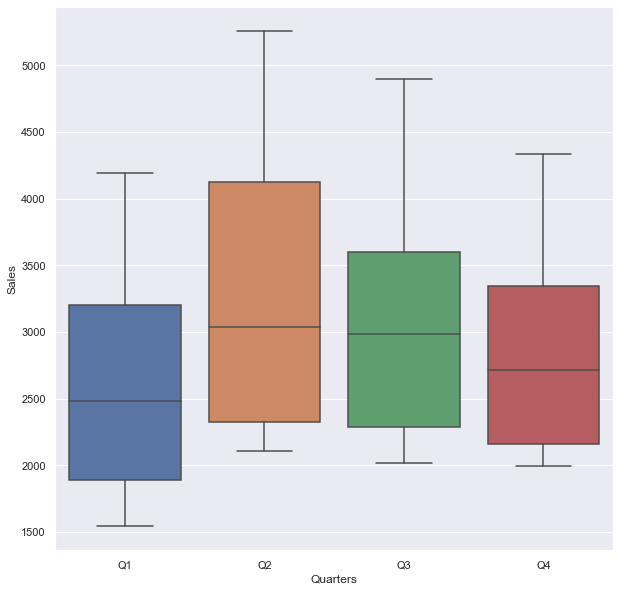

In [19]:
sn.boxplot(x='Quarters',y='Sales',data=cc)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<function matplotlib.pyplot.show(close=None, block=None)>

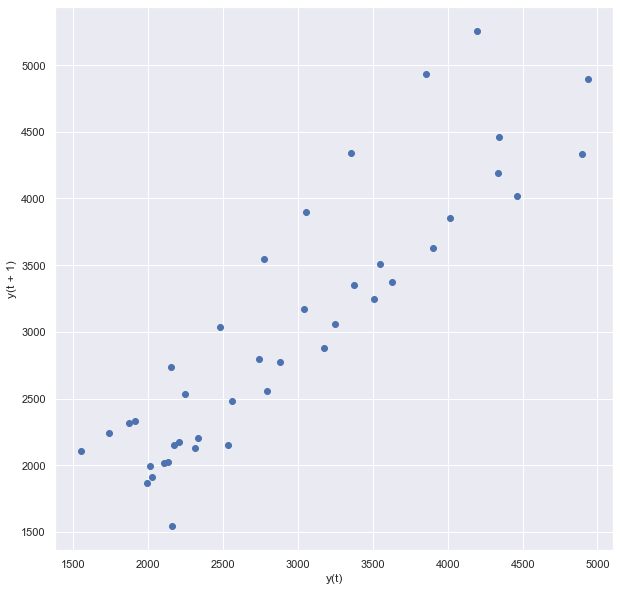

In [20]:
from pandas.plotting import lag_plot
lag_plot(cc_final['Sales'])
plt.show

<AxesSubplot:xlabel='Year', ylabel='Sales'>

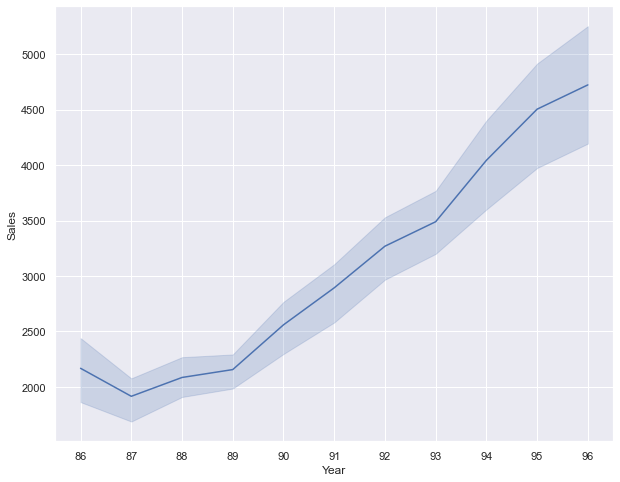

In [21]:
plt.figure(figsize=(10,8))
sn.lineplot(x='Year',y='Sales',data=cc_final)

<AxesSubplot:xlabel='Quarters', ylabel='Year'>

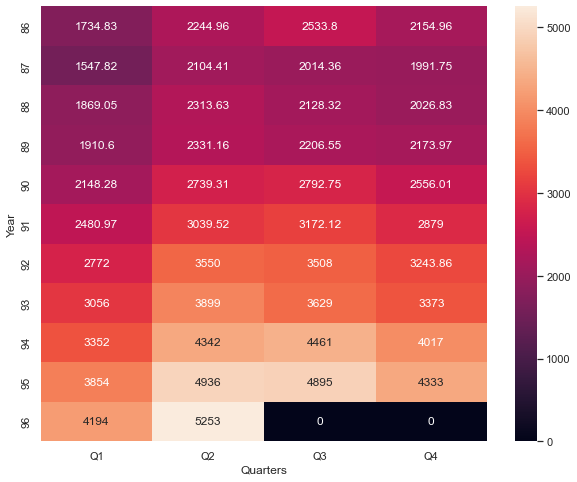

In [22]:
plt.figure(figsize=(10,8))
heatmap_y_month=pd.pivot_table(data=cc,values='Sales',index='Year',columns='Quarters',aggfunc='mean',fill_value=0)
sn.heatmap(heatmap_y_month,annot=True,fmt='g')

<function matplotlib.pyplot.show(close=None, block=None)>

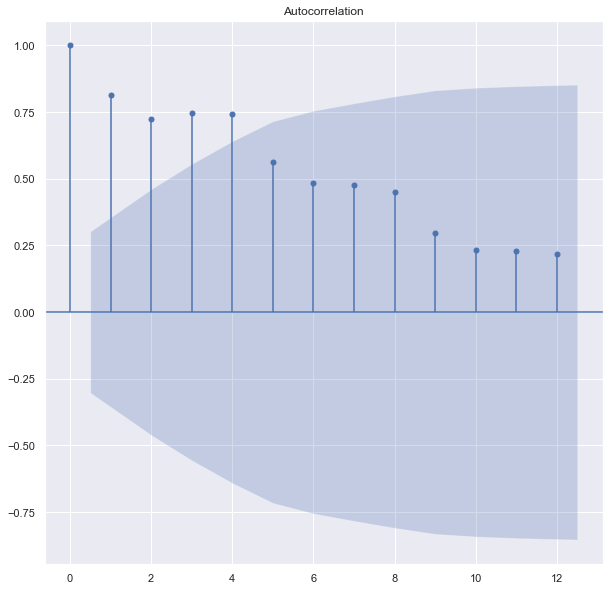

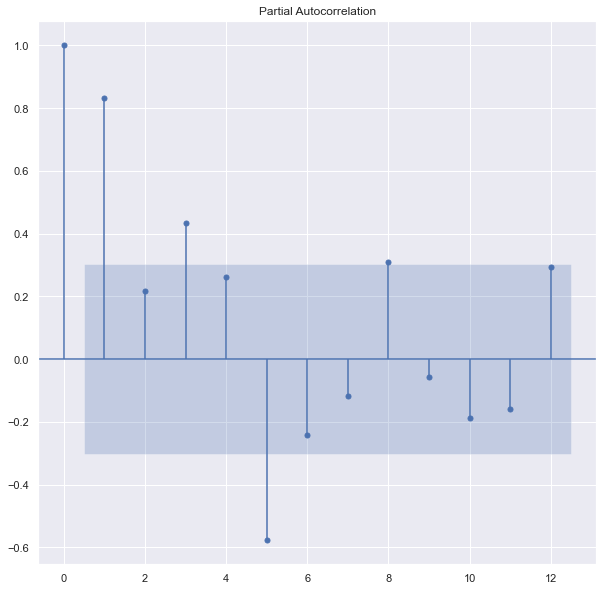

In [23]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(cc_final.Sales,lags=12)
tsp.plot_pacf(cc_final.Sales,lags=12)
plt.show

## Data Driven Forecasting Models

In [24]:
from statsmodels.tsa.holtwinters import Holt,SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

## Splitting Data

In [61]:
train=cc_final.head(32)
test=cc_final.tail(10)

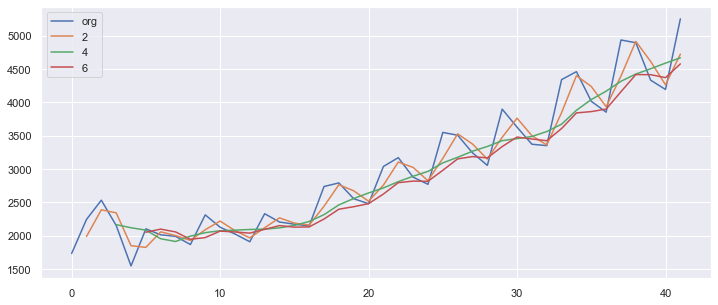

In [63]:
plt.figure(figsize=(12,5))
cc_final.Sales.plot(label='org')
for i in range(2,8,2):
    cc_final['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time series decomposition plot

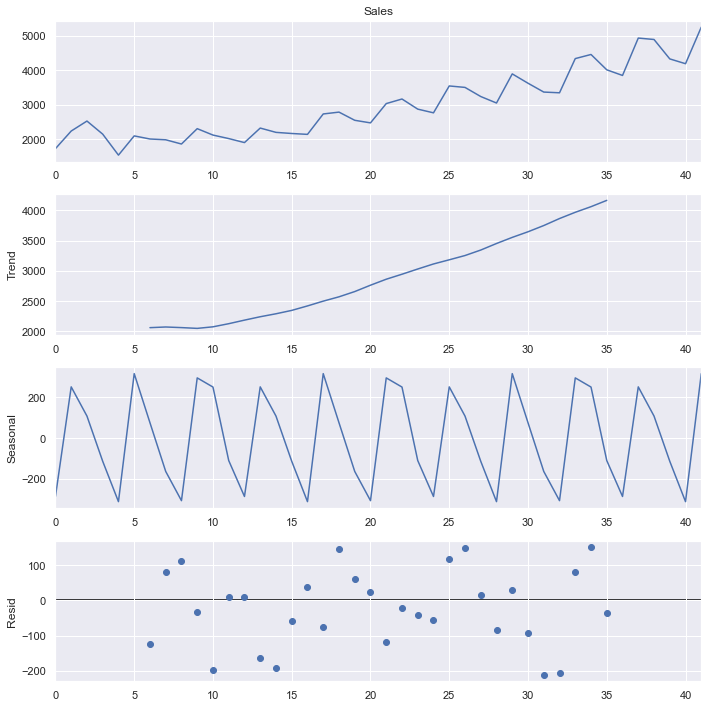

In [64]:
decompose_ts_add=seasonal_decompose(cc_final.Sales,period=12)
decompose_ts_add.plot()
plt.show()

## Evaluation Metric RMSE

In [65]:
def RMSE(org,pred):
    rmse=np.sqrt(np.mean(np.array(org)-np.array(pred))**2)
    return rmse

## Simple Exponential Smoothing method

In [68]:
ses_model=SimpleExpSmoothing(train['Sales']).fit()
pred_ses_model=ses_model.predict(start=test.index[0],end=test.index[-1])
rmse_ses_model=RMSE(pred_ses_model,test.Sales)
rmse_ses_model

886.9640139363935

## Holt Method/Double Exp Model

In [69]:
holt_model=Holt(train['Sales']).fit()
pred_holt_model=holt_model.predict(start=test.index[0],end=test.index[-1])
rmse_holt_model=RMSE(pred_holt_model,test.Sales)
rmse_holt_model

619.3556635141783

## Holts winter exponential smoothing with Additive Seasonality and Additive Trend 

In [70]:
hes_as_at_model=ExponentialSmoothing(train['Sales'],seasonal='add',trend='add',seasonal_periods=4).fit()
pred_hes_as_at_model=hes_as_at_model.predict(start=test.index[0],end=test.index[-1])
rmse_hes_as_at_model=RMSE(pred_hes_as_at_model,test.Sales)
rmse_hes_as_at_model

429.9447754381934

## Holts winter Exponential Smoothing with Multiple Seasonality and Additive trend

In [71]:
hes_ms_at_model=ExponentialSmoothing(train['Sales'],seasonal='mul',trend='add',seasonal_periods=12).fit()
pred_hes_ms_at_model=hes_ms_at_model.predict(start=test.index[0],end=test.index[-1])
rmse_hes_ms_at_model=RMSE(test.Sales,pred_hes_ms_at_model)
rmse_hes_ms_at_model

305.168734661338

## Model Based Forecasting Methods

In [72]:
cc_final['t']=np.arange(1,43)
cc_final['t_sqr']=cc_final['t']*cc_final['t']
cc_final['log_sales']=np.log(cc_final['Sales'])
cc_final.head()

,Quarter,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4,t,t_sqr,log_sales
0,Q1_86,1734.827000,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,87,1,0,0,0,5,25,7.344602


## Splitting the data

In [73]:
train_data=cc_final.head(32)
test_data=cc_final.tail(10)

## Linear Model

In [74]:
import statsmodels.formula.api as smf
linear_model=smf.ols('Sales~t',data=train_data).fit()
pred_lmodel=pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_lmodel=RMSE(test_data['Sales'],pred_lmodel)
rmse_lmodel

603.8900128503703

## Exponential Model

In [80]:
expo_model=smf.ols('log_sales~t',data=train_data).fit()
pred_expo_model=pd.Series(expo_model.predict(pd.DataFrame(test_data['t'])))
rmse_expo_model=RMSE(test_data['Sales'],np.exp(pred_expo_model))
rmse_expo_model

408.7644734003745

## Quadratic Model

In [81]:
q_model=smf.ols('Sales~t+t_sqr',data=train_data).fit()
pred_q_model=pd.Series(q_model.predict(pd.DataFrame(test_data[['t','t_sqr']])))
rmse_q_model=RMSE(test_data['Sales'],pred_q_model)
rmse_q_model

164.83459922349022

## Additive Seasonality Model

In [82]:
asm_model=smf.ols('Sales~Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train_data).fit()
pred_asm_model=pd.Series(asm_model.predict(pd.DataFrame(test_data[['Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']])))
rmse_asm_model=RMSE(test_data['Sales'],pred_asm_model)
rmse_asm_model

1813.7846148014064

## Additive Seasonality Quadratic Model

In [83]:
asqm_model=smf.ols('Sales~t+t_sqr+Quarters_Q1+Quarters_Q2+Quarters_Q3',data=train_data).fit()
pred_asqm_model=pd.Series(asqm_model.predict(pd.DataFrame(test_data[['t','t_sqr','Quarters_Q1','Quarters_Q2','Quarters_Q3']])))
rmse_asqm_model=RMSE(test_data['Sales'],pred_asqm_model)
rmse_asqm_model

156.94950545574574

## Mulitiplicative Seasonlity Model

In [88]:
msm_model=smf.ols('log_sales~Quarters_Q1+Quarters_Q2+Quarters_Q3',data=train_data).fit()
pred_msm_model=pd.Series(msm_model.predict(pd.DataFrame(test_data[['Quarters_Q1','Quarters_Q2','Quarters_Q3']])))
rmse_msm_model=RMSE(test_data['Sales'],np.exp(pred_msm_model))
rmse_msm_model

1872.091839107546

## Mulitplicative Additive Seasonality Model

In [89]:
masm_model=smf.ols('log_sales~t+t_sqr+Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train_data).fit()
pred_masm_model=pd.Series(masm_model.predict(pd.DataFrame(test_data[['t','t_sqr','Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']])))
rmse_masm_model=RMSE(test_data['Sales'],np.exp(pred_masm_model))
rmse_masm_model

670.7722077693662

In [90]:
list=[['Simple Exponential Method',rmse_ses_model],['Holt Method',rmse_holt_model],['Holt expo Smoothing add',rmse_hes_as_at_model],
       ['Holt expo Smoothing Multi',rmse_hes_ms_at_model],['Linear model',rmse_lmodel],['Exponential Method',rmse_expo_model],
       ['Quadratic Method',rmse_q_model],['Add Seasonality Method',rmse_asm_model],['Add Seasonality Quad method',rmse_asqm_model],
      ['Muliti Seasonality Method',rmse_msm_model],['Multi add seasonality Method',rmse_masm_model]]
score=pd.DataFrame(list,columns=['Model','RMSE_values'])
score

,Model,RMSE_values
0,Simple Exponential Method,886.964014
1,Holt Method,619.355664
2,Holt expo Smoothing add,429.944775
3,Holt expo Smoothing Multi,305.168735
4,Linear model,603.890013
5,Exponential Method,408.764473
6,Quadratic Method,164.834599
7,Add Seasonality Method,1813.784615
8,Add Seasonality Quad method,156.949505
9,Muliti Seasonality Method,1872.091839


### By analizying the above we can understand that Additive Seasonality Quadratic Method has lowest rmse value

In [91]:
list_new=[['Linear model',rmse_lmodel],['Exponential Method',rmse_expo_model],['Quadratic Method',rmse_q_model],['Add Seasonality Method',rmse_asm_model],['Add Seasonality Quad method',rmse_asqm_model],
      ['Muliti Seasonality Method',rmse_msm_model],['Multi add seasonality Method',rmse_masm_model]]
score_new=pd.DataFrame(list_new,columns=['Model','RMSE_values'])
score_new

,Model,RMSE_values
0,Linear model,603.890013
1,Exponential Method,408.764473
2,Quadratic Method,164.834599
3,Add Seasonality Method,1813.784615
4,Add Seasonality Quad method,156.949505
5,Muliti Seasonality Method,1872.091839
6,Multi add seasonality Method,670.772208


## Building a model on lowest RMSE value - Exponential Method(exp_model)

In [96]:
cc_final.head()

,Quarter,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4,t,t_sqr,log_sales
0,Q1_86,1734.827000,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,87,1,0,0,0,5,25,7.344602


In [99]:
final_model=smf.ols('Sales~t+t_sqr+Quarters_Q1+Quarters_Q2+Quarters_Q3',data=cc_final).fit()
pred_final=pd.Series(final_model.predict(pd.DataFrame(cc_final[['t','t_sqr','Quarters_Q1','Quarters_Q2','Quarters_Q3']])))
rmse_final=RMSE(cc_final['Sales'],pred_final)
rmse_final

1.521508844840961e-10

In [101]:
pred_df=pd.DataFrame({'Actual':cc_final.Sales,'Predicted':pred_final})
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


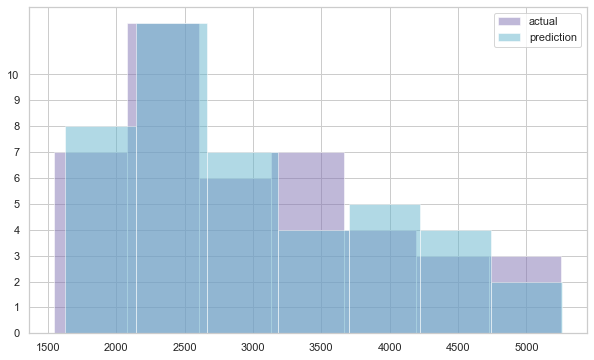

In [104]:
sn.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (10, 6)
_, ax = plt.subplots()
ax.hist(cc_final.Sales, color = 'm', alpha = 0.5, label='actual',bins=7)
ax.hist(pred_final, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc='best')
plt.show()

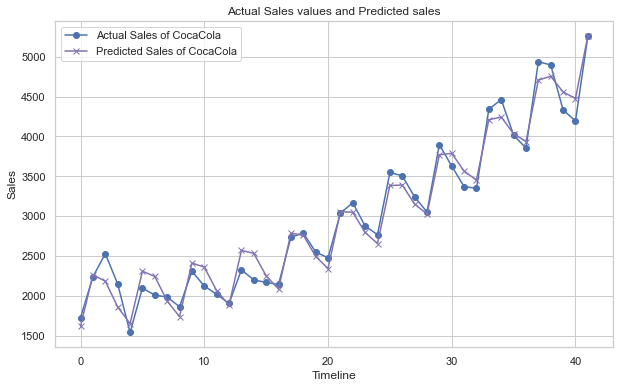

In [106]:
plt.plot(cc_final.Sales, color='b',marker='o',label='Actual Sales of CocaCola')
plt.plot(pred_final, color='m',marker='x', label='Predicted Sales of CocaCola')

#Added titles and adjust dimesnions
plt.title('Actual Sales values and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize'] =(10,5)

plt.show()